In [292]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


kkt条件の完成(m=3)\
12/12 u_optimeze内の変数をu0,u1,,,からu[0],u[1],,,に変更

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
df = pd.read_csv("output.csv",header=None)
#クラスタ数宣言
c=2
#Kはクラスタサイズ 
K=5
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape
max_iter = 100
cluster = [0 for i in range(10)]
distances=np.zeros((X_size,c))
best_J = 10000

In [295]:
#uの最適化部分関数作成
def u_optimize(d,J):
    #変数定義
    u = [0] * 20
    for i in  range (20):
        u[i] = cp.Variable()
    #uの最適化
    # 最小化したい関数 (目的関数)　
    objective = cp.Minimize(
        d[0]*cp.power(u[0],3)+d[1]*cp.power(u[1],3)+d[2]*cp.power(u[2],3)+d[3]*cp.power(u[3],3)+d[4]*cp.power(u[4],3)+\
        d[5]*cp.power(u[5],3)+d[6]*cp.power(u[6],3)+d[7]*cp.power(u[7],3)+d[8]*cp.power(u[8],3)+d[9]*cp.power(u[9],3)+\
    d[10]*cp.power(u[10],3)+d[11]*cp.power(u[11],3)+d[12]*cp.power(u[12],3)+d[13]*cp.power(u[13],3)+d[14]*cp.power(u[14],3)+\
    d[15]*cp.power(u[15],3)+d[16]*cp.power(u[16],3)+d[17]*cp.power(u[17],3)+d[18]*cp.power(u[18],3)+d[19]*cp.power(u[19],3))
    # 制約条件
    constraints = [
        u[0]>=0,u[1]>=0,u[2]>=0,u[3]>=0,u[4]>=0,u[5]>=0,u[6]>=0,u[7]>=0,u[8]>=0,u[9]>=0,u[10]>=0,
        u[11]>=0,u[12]>=0,u[13]>=0,u[14]>=0,u[15]>=0,u[16]>=0,u[17]>=0,u[18]>=0,u[19]>=0,
        u[0]+u[1]==1,u[2]+u[3]==1,u[4]+u[5]==1,u[6]+u[7]==1,u[8]+u[9]==1,u[10]+u[11]==1,u[12]+u[13]==1,u[14]+u[15]==1,
        u[16]+u[17]==1,u[18]+u[19]==1,u[0]+u[2]+u[4]+u[6]+u[8]+u[10]+u[12]+u[14]+u[16]+u[18]-5==0,\
        u[1]+u[3]+u[5]+u[7]+u[9]+u[11]+u[13]+u[15]+u[17]+u[19]-5==0]
    # 問題を定義
    problem = cp.Problem(objective, constraints)
    # 最適化 (戻り値は最適化後に得られた値=最小値)
    result = problem.solve()
    #帰属度uと目的関数Jの値を抽出(ndarray型)
    u_value = np.empty(0)#空のndarrayを作成
    u_value = np.append(u_value,u[0].value)
    u_value = np.append(u_value,u[1].value)
    u_value = np.append(u_value,u[2].value)
    u_value = np.append(u_value,u[3].value)
    u_value = np.append(u_value,u[4].value)
    u_value = np.append(u_value,u[5].value)
    u_value = np.append(u_value,u[6].value)
    u_value = np.append(u_value,u[7].value)
    u_value = np.append(u_value,u[8].value)
    u_value = np.append(u_value,u[9].value)
    u_value = np.append(u_value,u[10].value)
    u_value = np.append(u_value,u[11].value)
    u_value = np.append(u_value,u[12].value)
    u_value = np.append(u_value,u[13].value)
    u_value = np.append(u_value,u[14].value)
    u_value = np.append(u_value,u[15].value)
    u_value = np.append(u_value,u[16].value)
    u_value = np.append(u_value,u[17].value)
    u_value = np.append(u_value,u[18].value)
    u_value = np.append(u_value,u[19].value)
    u_list = u_value.reshape([10,2])
    u = u_value
    J = np.append(J,result)
    return u,J
#クラスタ中心計算部分関数作成
def v_calculation(u):
    #分母計算(クラスタサイズになるはず)
    v0_denominator=0
    v1_denominator=0
    for i in range(0,20,2):
        v0_denominator += u[i]**3
    for i in range(1,20,2):
        v1_denominator += u[i]**3
    #分子計算
    v0_numerator = 0
    v1_numerator = 0
    for i in range(10):
        v0_numerator += u[i*2]**3*X[i]
        v1_numerator += u[1+i*2]**3*X[i]
    v=[0 for i in range(2)]
    v[0] = v0_numerator / v0_denominator
    v[1] = v1_numerator / v1_denominator
    return v

for s in range (10):
    centroids = X[np.random.choice(X_size,c)]
    J = np.empty(0)
    for epoch in range(max_iter):
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d=[]
        for i in range(X_size):
            for j in range(c):
                d.append(np.sum((X[i]-centroids[j])**2))
        #uの更新
        optimize_result = u_optimize(d,J)
        u = optimize_result[0]
        J = optimize_result[1]
        #vの更新
        v = v_calculation(u)
        new_centroids = np.array(v)
        new_centroids_kai = new_centroids[::-1,]
        # もしも重心が変わっていなかったら終了
        if (np.allclose(new_centroids, centroids) or np.allclose(new_centroids_kai, centroids)):
            print("中心が変わらないのでbreakします！")
            break
        centroids =  np.copy(new_centroids)
    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if best_J > J[-1]:
        for i in range (10):
            if u[i*2]>u[1+i*2]:
                cluster[i] = 0
            else:
                cluster[i] = 1
        np_cluster = np.array(cluster)
        #最適な目的関数の更新
        best_J = J[-1]
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
    print(s)
    print("回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(cluster)
print(best_J)
print(best_centroids)

中心が変わらないのでbreakします！
0
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
1
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
2
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
3
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
4
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
5
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
6
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
7
回目のクラスタリング結果↓
0.05110838333098994
[[0.69657135 0.51811532]
 [0.49367881 0.54282907]]
終了
中心が変わらないのでbreakします！
8
回目のクラスタリング結果↓
0.051108383201957305
[[0.49367891 0.54283415]
 [0.69657762 0.51811205]]
終了
中心が変わらないの

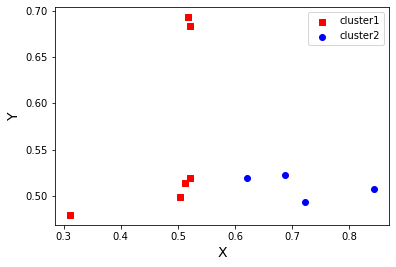

In [296]:

#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])

#ax.set_title('fecbo', size=16)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2'])  # 凡例を表示

plt.show()

fig.savefig("kkt.pdf")

In [283]:
#実験用セル
#dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
d=[]
centroids = X[np.random.choice(X_size,c)]
print("centroids")
print(centroids)
for i in range(X_size):
    for j in range(c):
        d.append(np.sum((X[i]-centroids[j])**2))

#uの最適化
# 最小化したい関数 (目的関数)　
objective = cp.Minimize(
    d[0]*cp.power(u0,3)+d[1]*cp.power(u1,3)+d[2]*cp.power(u2,3)+d[3]*cp.power(u3,3)+d[4]*cp.power(u4,3)+\
    d[5]*cp.power(u5,3)+d[6]*cp.power(u6,3)+d[7]*cp.power(u7,3)+d[8]*cp.power(u8,3)+d[9]*cp.power(u9,3)+\
    d[10]*cp.power(u10,3)+d[11]*cp.power(u11,3)+d[12]*cp.power(u12,3)+d[13]*cp.power(u13,3)+d[14]*cp.power(u14,3)+\
    d[15]*cp.power(u15,3)+d[16]*cp.power(u16,3)+d[17]*cp.power(u17,3)+d[18]*cp.power(u18,3)+d[19]*cp.power(u19,3))
# 制約条件
constraints = [
    u0>=0,u1>=0,u2>=0,u3>=0,u4>=0,u5>=0,u6>=0,u7>=0,u8>=0,u9>=0,u10>=0,
    u11>=0,u12>=0,u13>=0,u14>=0,u15>=0,u16>=0,u17>=0,u18>=0,u19>=0,
    u0+u1==1,u2+u3==1,u4+u5==1,u6+u7==1,u8+u9==1,u10+u11==1,u12+u13==1,u14+u15==1,
    u16+u17==1,u18+u19==1,u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5==0,u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5==0]
# 問題を定義
problem = cp.Problem(objective, constraints)
# 最適化 (戻り値は最適化後に得られた値=最小値)
result = problem.solve()
#帰属度uと目的関数Jの値を抽出(ndarray型)
u_value = np.empty(0)#空のndarrayを作成
u_value = np.append(u_value,u0.value)
u_value = np.append(u_value,u1.value)
u_value = np.append(u_value,u2.value)
u_value = np.append(u_value,u3.value)
u_value = np.append(u_value,u4.value)
u_value = np.append(u_value,u5.value)
u_value = np.append(u_value,u6.value)
u_value = np.append(u_value,u7.value)
u_value = np.append(u_value,u8.value)
u_value = np.append(u_value,u9.value)
u_value = np.append(u_value,u10.value)
u_value = np.append(u_value,u11.value)
u_value = np.append(u_value,u12.value)
u_value = np.append(u_value,u13.value)
u_value = np.append(u_value,u14.value)
u_value = np.append(u_value,u15.value)
u_value = np.append(u_value,u16.value)
u_value = np.append(u_value,u17.value)
u_value = np.append(u_value,u18.value)
u_value = np.append(u_value,u19.value)
u_list = u_value.reshape([10,2])
print(u_list)
print("帰属度とクラスタサイズの確認")
print(np.sum(u_list, axis=1))#行ごとの合計値1になるはず
print(np.sum(u_list, axis=0))#列ごとの合計値Kになるはず

centroids
[[0.520833 0.519167]
 [0.8433   0.5075  ]]
[[7.09479996e-01 2.90520004e-01]
 [7.07025374e-01 2.92974626e-01]
 [6.16993023e-01 3.83006977e-01]
 [6.99704119e-01 3.00295881e-01]
 [1.63690404e-01 8.36309596e-01]
 [6.14901139e-01 3.85098861e-01]
 [2.69952813e-10 1.00000000e+00]
 [5.08730739e-01 4.91269261e-01]
 [3.05204388e-01 6.94795612e-01]
 [6.74270817e-01 3.25729183e-01]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]


In [274]:
u_list = u_value.reshape([10,2])
u = u_value

In [275]:
u

array([3.95142395e-01, 6.04857605e-01, 3.87514929e-01, 6.12485071e-01,
       4.56007492e-01, 5.43992508e-01, 3.80018469e-01, 6.19981531e-01,
       7.09377530e-01, 2.90622470e-01, 4.58537701e-01, 5.41462299e-01,
       5.87901638e-01, 4.12098362e-01, 1.72539031e-01, 8.27460969e-01,
       9.99999995e-01, 4.88860055e-09, 4.52960821e-01, 5.47039179e-01])

In [133]:
#下書き（関数作成前のセル）
for s in range (10):
    print(s)
    print("回目")
    centroids = X[np.random.choice(X_size,c)]
    J = np.empty(0)
    for epoch in range(max_iter):
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d=[]
        print("centroids")
        print(centroids)
        for i in range(X_size):
            for j in range(c):
                d.append(np.sum((X[i]-centroids[j])**2))

        #uの最適化
        # 最小化したい関数 (目的関数)　
        objective = cp.Minimize(
            d[0]*cp.power(u0,3)+d[1]*cp.power(u1,3)+d[2]*cp.power(u2,3)+d[3]*cp.power(u3,3)+d[4]*cp.power(u4,3)+\
            d[5]*cp.power(u5,3)+d[6]*cp.power(u6,3)+d[7]*cp.power(u7,3)+d[8]*cp.power(u8,3)+d[9]*cp.power(u9,3)+\
            d[10]*cp.power(u10,3)+d[11]*cp.power(u11,3)+d[12]*cp.power(u12,3)+d[13]*cp.power(u13,3)+d[14]*cp.power(u14,3)+\
            d[15]*cp.power(u15,3)+d[16]*cp.power(u16,3)+d[17]*cp.power(u17,3)+d[18]*cp.power(u18,3)+d[19]*cp.power(u19,3))
        # 制約条件
        constraints = [
            u0>=0,u1>=0,u2>=0,u3>=0,u4>=0,u5>=0,u6>=0,u7>=0,u8>=0,u9>=0,u10>=0,
            u11>=0,u12>=0,u13>=0,u14>=0,u15>=0,u16>=0,u17>=0,u18>=0,u19>=0,
            u0+u1==1,u2+u3==1,u4+u5==1,u6+u7==1,u8+u9==1,u10+u11==1,u12+u13==1,u14+u15==1,
            u16+u17==1,u18+u19==1,u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5==0,u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5==0]
        # 問題を定義
        problem = cp.Problem(objective, constraints)
        # 最適化 (戻り値は最適化後に得られた値=最小値)
        result = problem.solve()
        #帰属度uと目的関数Jの値を抽出(ndarray型)
        u_value = np.empty(0)#空のndarrayを作成
        u_value = np.append(u_value,u0.value)
        u_value = np.append(u_value,u1.value)
        u_value = np.append(u_value,u2.value)
        u_value = np.append(u_value,u3.value)
        u_value = np.append(u_value,u4.value)
        u_value = np.append(u_value,u5.value)
        u_value = np.append(u_value,u6.value)
        u_value = np.append(u_value,u7.value)
        u_value = np.append(u_value,u8.value)
        u_value = np.append(u_value,u9.value)
        u_value = np.append(u_value,u10.value)
        u_value = np.append(u_value,u11.value)
        u_value = np.append(u_value,u12.value)
        u_value = np.append(u_value,u13.value)
        u_value = np.append(u_value,u14.value)
        u_value = np.append(u_value,u15.value)
        u_value = np.append(u_value,u16.value)
        u_value = np.append(u_value,u17.value)
        u_value = np.append(u_value,u18.value)
        u_value = np.append(u_value,u19.value)
        u_list = u_value.reshape([10,2])
        u = u_value
        J = np.append(J,result)
        #print(u_list)
        print("帰属度とクラスタサイズの確認")
        print(np.sum(u_list, axis=1))#行ごとの合計値1になるはず
        print(np.sum(u_list, axis=0))#列ごとの合計値Kになるはず
        print("目的関数のリスト")
        print(J)
        """
        for i in range(0,20,2):
            print(u_value[i]+u_value[i+1])
        print(u_value[0]+u_value[2]+u_value[4]+u_value[6]+u_value[8]+u_value[10]+u_value[12]+u_value[14]+u_value[16]+u_value[18])
        print(u_value[1]+u_value[3]+u_value[5]+u_value[7]+u_value[9]+u_value[11]+u_value[13]+u_value[15]+u_value[17]+u_value[19])
        u = u_value
        """
        #分母計算(クラスタサイズになるはず)
        v0_denominator=0
        v1_denominator=0
        for i in range(0,20,2):
            v0_denominator += u[i]**3
        for i in range(1,20,2):
            v1_denominator += u[i]**3
        #print(v0_denominator,v1_denominator)
        #分子計算
        v0_numerator = 0
        v1_numerator = 0
        for i in range(10):
            v0_numerator += u[i*2]**3*X[i]
            v1_numerator += u[1+i*2]**3*X[i]
        #print(v0_numerator,v1_numerator)
        v=[0 for i in range(2)]
        v[0] = v0_numerator / v0_denominator
        v[1] = v1_numerator / v1_denominator
        print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))

        cluster = [0 for i in range(10)]
        for i in range (10):
            if u[i*2]>u[1+i*2]:
                cluster[i] = 0
            else:
                cluster[i] = 1
        np_cluster =np.array(cluster)
        print(np_cluster)
        new_centroids = np.array(v)
        new_centroids_kai = new_centroids[::-1,]
        # もしも重心が変わっていなかったら終了
        if (np.allclose(new_centroids, centroids) or np.allclose(new_centroids_kai, centroids)):
            print("breakしやす！")
            break
        print("中心が変わったのでもう一回回します")
        if best_J > J[-1]:
            #最適な目的関数の更新
            best_J = J[-1]
            #目的関数が小さくなるときの重心を格納
            best_centroids = np.copy(centroids)
        centroids =  np.copy(new_centroids)
    print("100回終わり、一番良い結果を出力します")
    print(best_centroids)


#dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
d=[]
print("centroids")
print(centroids)
for i in range(X_size):
    for j in range(c):
        d.append(np.sum((X[i]-centroids[j])**2))

#uの最適化
# 最小化したい関数 (目的関数)　
objective = cp.Minimize(
    d[0]*cp.power(u0,3)+d[1]*cp.power(u1,3)+d[2]*cp.power(u2,3)+d[3]*cp.power(u3,3)+d[4]*cp.power(u4,3)+\
    d[5]*cp.power(u5,3)+d[6]*cp.power(u6,3)+d[7]*cp.power(u7,3)+d[8]*cp.power(u8,3)+d[9]*cp.power(u9,3)+\
    d[10]*cp.power(u10,3)+d[11]*cp.power(u11,3)+d[12]*cp.power(u12,3)+d[13]*cp.power(u13,3)+d[14]*cp.power(u14,3)+\
    d[15]*cp.power(u15,3)+d[16]*cp.power(u16,3)+d[17]*cp.power(u17,3)+d[18]*cp.power(u18,3)+d[19]*cp.power(u19,3))
# 制約条件
constraints = [
    u0>=0,u1>=0,u2>=0,u3>=0,u4>=0,u5>=0,u6>=0,u7>=0,u8>=0,u9>=0,u10>=0,
    u11>=0,u12>=0,u13>=0,u14>=0,u15>=0,u16>=0,u17>=0,u18>=0,u19>=0,
    u0+u1==1,u2+u3==1,u4+u5==1,u6+u7==1,u8+u9==1,u10+u11==1,u12+u13==1,u14+u15==1,
    u16+u17==1,u18+u19==1,u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5==0,u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5==0]
# 問題を定義
problem = cp.Problem(objective, constraints)
# 最適化 (戻り値は最適化後に得られた値=最小値)
result = problem.solve()
#帰属度uと目的関数Jの値を抽出(ndarray型)
u_value = np.empty(0)#空のndarrayを作成
u_value = np.append(u_value,u0.value)
u_value = np.append(u_value,u1.value)
u_value = np.append(u_value,u2.value)
u_value = np.append(u_value,u3.value)
u_value = np.append(u_value,u4.value)
u_value = np.append(u_value,u5.value)
u_value = np.append(u_value,u6.value)
u_value = np.append(u_value,u7.value)
u_value = np.append(u_value,u8.value)
u_value = np.append(u_value,u9.value)
u_value = np.append(u_value,u10.value)
u_value = np.append(u_value,u11.value)
u_value = np.append(u_value,u12.value)
u_value = np.append(u_value,u13.value)
u_value = np.append(u_value,u14.value)
u_value = np.append(u_value,u15.value)
u_value = np.append(u_value,u16.value)
u_value = np.append(u_value,u17.value)
u_value = np.append(u_value,u18.value)
u_value = np.append(u_value,u19.value)
u_list = u_value.reshape([10,2])
u = u_value
J = np.append(J,result)
#print(u_list)
print("帰属度とクラスタサイズの確認")
print(np.sum(u_list, axis=1))#行ごとの合計値1になるはず
print(np.sum(u_list, axis=0))#列ごとの合計値Kになるはず
print("目的関数のリスト")
print(J)
"""
for i in range(0,20,2):
    print(u_value[i]+u_value[i+1])
print(u_value[0]+u_value[2]+u_value[4]+u_value[6]+u_value[8]+u_value[10]+u_value[12]+u_value[14]+u_value[16]+u_value[18])
print(u_value[1]+u_value[3]+u_value[5]+u_value[7]+u_value[9]+u_value[11]+u_value[13]+u_value[15]+u_value[17]+u_value[19])
u = u_value
"""
#分母計算(クラスタサイズになるはず)
v0_denominator=0
v1_denominator=0
for i in range(0,20,2):
    v0_denominator += u[i]**3
for i in range(1,20,2):
    v1_denominator += u[i]**3
#print(v0_denominator,v1_denominator)
#分子計算
v0_numerator = 0
v1_numerator = 0
for i in range(10):
    v0_numerator += u[i*2]**3*X[i]
    v1_numerator += u[1+i*2]**3*X[i]
#print(v0_numerator,v1_numerator)
v=[0 for i in range(2)]
v[0] = v0_numerator / v0_denominator
v[1] = v1_numerator / v1_denominator
print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))

cluster = [0 for i in range(10)]
for i in range (10):
    if u[i*2]>u[1+i*2]:
        cluster[i] = 0
    else:
        cluster[i] = 1
np_cluster =np.array(cluster)
print(np_cluster)

0
回目
centroids
[[0.5175   0.693333]
 [0.686667 0.5225  ]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.06868287]
クラスター中心はcluster1:[0.5091895  0.64378323],cluster2:[0.66712979 0.5094388 ]
[0 0 0 0 1 0 1 1 1 0]
中心が変わったのでもう一回回します
centroids
[[0.5091895  0.64378323]
 [0.66712979 0.5094388 ]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.06868287 0.05933421]
クラスター中心はcluster1:[0.50614954 0.62002249],cluster2:[0.67032793 0.51013642]
[0 0 0 0 1 0 1 1 1 0]
中心が変わったのでもう一回回します
centroids
[[0.50614954 0.62002249]
 [0.67032793 0.51013642]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.06868287 0.05933421 0.05690816]
クラスター中心はcluster1:[0.5022359  0.59678011],cluster2:[0.67847179 0.51146329]
[0 0 0 0 1 0 1 1 1 0]
中心が変わったのでもう一回回します
centroids
[[0.5022359  0.59678011]
 [0.67847179 0.51146329]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.06868287 0.05933421 0.05690816 0.05450541]
クラスター中心はcluster1:[0.49830345 0.57578753],cl

/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.10842855]
クラスター中心はcluster1:[0.73528751 0.5083955 ],cluster2:[0.5004544 0.593381 ]
[1 1 1 1 0 1 0 0 0 1]
中心が変わったのでもう一回回します
centroids
[[0.73528751 0.5083955 ]
 [0.5004544  0.593381  ]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.10842855 0.05611152]
クラスター中心はcluster1:[0.71096722 0.50906516],cluster2:[0.4945919  0.56977215]
[1 1 1 1 0 1 0 0 0 1]
中心が変わったのでもう一回回します
centroids
[[0.71096722 0.50906516]
 [0.4945919  0.56977215]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.10842855 0.05611152 0.05228789]
クラスター中心はcluster1:[0.7049537  0.51192137],cluster2:[0.49413503 0.55643063]
[1 1 1 1 0 1 0 0 0 1]
中心が変わったのでもう一回回します
centroids
[[0.7049537  0.51192137]
 [0.49413503 0.55643063]]
帰属度とクラスタサイズの確認
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]
目的関数のリスト
[0.10842855 0.05611152 0.05228789 0.05147639]
クラスター中心はcluster1:[0.70119506 0.51508253],cluster2:[0.49396961 0.54935105]
[1 1 1 1 0 1 0 0 0 1]
中心が変わった

In [244]:
#uの最適化部分関数作成セル
def u_optimize(d,J):
    #uの最適化
    # 最小化したい関数 (目的関数)　
    objective = cp.Minimize(
        d[0]*cp.power(u0,3)+d[1]*cp.power(u1,3)+d[2]*cp.power(u2,3)+d[3]*cp.power(u3,3)+d[4]*cp.power(u4,3)+\
        d[5]*cp.power(u5,3)+d[6]*cp.power(u6,3)+d[7]*cp.power(u7,3)+d[8]*cp.power(u8,3)+d[9]*cp.power(u9,3)+\
        d[10]*cp.power(u10,3)+d[11]*cp.power(u11,3)+d[12]*cp.power(u12,3)+d[13]*cp.power(u13,3)+d[14]*cp.power(u14,3)+\
        d[15]*cp.power(u15,3)+d[16]*cp.power(u16,3)+d[17]*cp.power(u17,3)+d[18]*cp.power(u18,3)+d[19]*cp.power(u19,3))
    # 制約条件
    constraints = [
        u0>=0,u1>=0,u2>=0,u3>=0,u4>=0,u5>=0,u6>=0,u7>=0,u8>=0,u9>=0,u10>=0,
        u11>=0,u12>=0,u13>=0,u14>=0,u15>=0,u16>=0,u17>=0,u18>=0,u19>=0,
        u0+u1==1,u2+u3==1,u4+u5==1,u6+u7==1,u8+u9==1,u10+u11==1,u12+u13==1,u14+u15==1,
        u16+u17==1,u18+u19==1,u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5==0,u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5==0]
    # 問題を定義
    problem = cp.Problem(objective, constraints)
    # 最適化 (戻り値は最適化後に得られた値=最小値)
    result = problem.solve()
    #帰属度uと目的関数Jの値を抽出(ndarray型)
    u_value = np.empty(0)#空のndarrayを作成
    u_value = np.append(u_value,u0.value)
    u_value = np.append(u_value,u1.value)
    u_value = np.append(u_value,u2.value)
    u_value = np.append(u_value,u3.value)
    u_value = np.append(u_value,u4.value)
    u_value = np.append(u_value,u5.value)
    u_value = np.append(u_value,u6.value)
    u_value = np.append(u_value,u7.value)
    u_value = np.append(u_value,u8.value)
    u_value = np.append(u_value,u9.value)
    u_value = np.append(u_value,u10.value)
    u_value = np.append(u_value,u11.value)
    u_value = np.append(u_value,u12.value)
    u_value = np.append(u_value,u13.value)
    u_value = np.append(u_value,u14.value)
    u_value = np.append(u_value,u15.value)
    u_value = np.append(u_value,u16.value)
    u_value = np.append(u_value,u17.value)
    u_value = np.append(u_value,u18.value)
    u_value = np.append(u_value,u19.value)
    u_list = u_value.reshape([10,2])
    u = u_value
    J = np.append(J,result)
    #print(u_list)
    #print("帰属度とクラスタサイズの確認")
    #print(np.sum(u_list, axis=1))#行ごとの合計値1になるはず
    #print(np.sum(u_list, axis=0))#列ごとの合計値Kになるはず
    #print("目的関数のリスト")
    #print(J)
    return u,J

In [253]:
#クラスタ中心計算部分関数作成セル
def v_calculation(u):
    #分母計算(クラスタサイズになるはず)
    v0_denominator=0
    v1_denominator=0
    for i in range(0,20,2):
        v0_denominator += u[i]**3
    for i in range(1,20,2):
        v1_denominator += u[i]**3
    #print(v0_denominator,v1_denominator)
    #分子計算
    v0_numerator = 0
    v1_numerator = 0
    for i in range(10):
        v0_numerator += u[i*2]**3*X[i]
        v1_numerator += u[1+i*2]**3*X[i]
    #print(v0_numerator,v1_numerator)
    v=[0 for i in range(2)]
    v[0] = v0_numerator / v0_denominator
    v[1] = v1_numerator / v1_denominator
    #print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))
    return v

In [246]:
#作業用セル
cluster = [0 for i in range(10)]
for s in range (10):
    centroids = X[np.random.choice(X_size,c)]
    J = np.empty(0)
    for epoch in range(max_iter):
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d=[]
        #print("centroids")
        #print(centroids)
        for i in range(X_size):
            for j in range(c):
                d.append(np.sum((X[i]-centroids[j])**2))
        #uの更新
        optimize_result = u_optimize(d,J)
        u = optimize_result[0]
        J = optimize_result[1]
        #vの更新
        v = v_calculation(u)
        cluster = [0 for i in range(10)]
        for i in range (10):
            if u[i*2]>u[1+i*2]:
                cluster[i] = 0
            else:
                cluster[i] = 1
        np_cluster =np.array(cluster)
        #print(np_cluster)
        new_centroids = np.array(v)
        new_centroids_kai = new_centroids[::-1,]
        # もしも重心が変わっていなかったら終了
        if (np.allclose(new_centroids, centroids) or np.allclose(new_centroids_kai, centroids)):
            print("中心が変わらないのでbreakします！")
            break
        centroids =  np.copy(new_centroids)
    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if best_J > J[-1]:
        for i in range (10):
            if u[i*2]>u[1+i*2]:
                cluster[i] = 0
            else:
                cluster[i] = 1
        
        #最適な目的関数の更新
        best_J = J[-1]
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
    print(s)
    print("回目のクラスタリング結果↓")
    #print(centroids)#最新の処理のクラスタ中心が表示されるはず
    #print(new_centroids)
    #print(J)#最新の処理の目的関数値が出るはず
    print(best_J)
    print(best_centroids)
    print("終了")
print(cluster)
print(best_J)
print(best_centroids)

中心が変わらないのでbreakします！
0
回目のクラスタリング結果↓
0.0511083832859157
[[0.49367878 0.54283493]
 [0.69657982 0.51811112]]
終了
中心が変わらないのでbreakします！
1
回目のクラスタリング結果↓
0.0511083832859157
[[0.49367878 0.54283493]
 [0.69657982 0.51811112]]
終了
中心が変わらないのでbreakします！
2
回目のクラスタリング結果↓
0.05110838326341905
[[0.69657233 0.51811484]
 [0.4936788  0.54282974]]
終了
中心が変わらないのでbreakします！
3
回目のクラスタリング結果↓
0.05110838326341905
[[0.69657233 0.51811484]
 [0.4936788  0.54282974]]
終了
中心が変わらないのでbreakします！
4
回目のクラスタリング結果↓
0.051108383250603046
[[0.69657981 0.51811139]
 [0.49367858 0.54283373]]
終了
中心が変わらないのでbreakします！
5
回目のクラスタリング結果↓
0.051108383250603046
[[0.69657981 0.51811139]
 [0.49367858 0.54283373]]
終了
中心が変わらないのでbreakします！
6
回目のクラスタリング結果↓
0.051108383250603046
[[0.69657981 0.51811139]
 [0.49367858 0.54283373]]
終了
中心が変わらないのでbreakします！
7
回目のクラスタリング結果↓
0.051108383250603046
[[0.69657981 0.51811139]
 [0.49367858 0.54283373]]
終了
中心が変わらないのでbreakします！
8
回目のクラスタリング結果↓
0.051108383250603046
[[0.69657981 0.51811139]
 [0.49367858 0.54283373]]
終了
中心が変わらな